In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("DailyDelhiClimateTrain.csv", parse_dates=['date'])
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000,84.500,0.000,1015.667
1,2013-01-02,7.400,92.000,2.980,1017.800
2,2013-01-03,7.167,87.000,4.633,1018.667
3,2013-01-04,8.667,71.333,1.233,1017.167
4,2013-01-05,6.000,86.833,3.700,1016.500
...,...,...,...,...,...
1457,2016-12-28,17.217,68.043,3.548,1015.565
1458,2016-12-29,15.238,87.857,6.000,1016.905
1459,2016-12-30,14.095,89.667,6.267,1017.905
1460,2016-12-31,15.053,87.000,7.325,1016.100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


In [4]:
for column in df.columns:
    unique_values = df[column].unique()
    unique_count = len(unique_values)
    
    print(f"\033[1m\033[91mColumn:\033[0m \033[1m\033[94m{column}\033[0m")
    print(f"\033[1m\033[92mNumber of Unique Values:\033[93m {unique_count}")

    if unique_count <= 10:
        print(f"\033[1mUnique Values:\033[0m {unique_values}\n")
    else:
        print(f"\033[95mFirst 10 Unique Values:\033[0m {unique_values[:25]}")
        print(f"... and {unique_count - 10} more unique values\n")

Column: date
Number of Unique Values: 1462
First 10 Unique Values: <DatetimeArray>
['2013-01-01 00:00:00', '2013-01-02 00:00:00', '2013-01-03 00:00:00',
 '2013-01-04 00:00:00', '2013-01-05 00:00:00', '2013-01-06 00:00:00',
 '2013-01-07 00:00:00', '2013-01-08 00:00:00', '2013-01-09 00:00:00',
 '2013-01-10 00:00:00', '2013-01-11 00:00:00', '2013-01-12 00:00:00',
 '2013-01-13 00:00:00', '2013-01-14 00:00:00', '2013-01-15 00:00:00',
 '2013-01-16 00:00:00', '2013-01-17 00:00:00', '2013-01-18 00:00:00',
 '2013-01-19 00:00:00', '2013-01-20 00:00:00', '2013-01-21 00:00:00',
 '2013-01-22 00:00:00', '2013-01-23 00:00:00', '2013-01-24 00:00:00',
 '2013-01-25 00:00:00']
Length: 25, dtype: datetime64[ns]
... and 1452 more unique values

Column: meantemp
Number of Unique Values: 617
First 10 Unique Values: [10.          7.4         7.16666667  8.66666667  6.          7.
  8.85714286 14.         11.         15.71428571 15.83333333 12.83333333
 14.71428571 13.83333333 16.5        12.5        11.285714

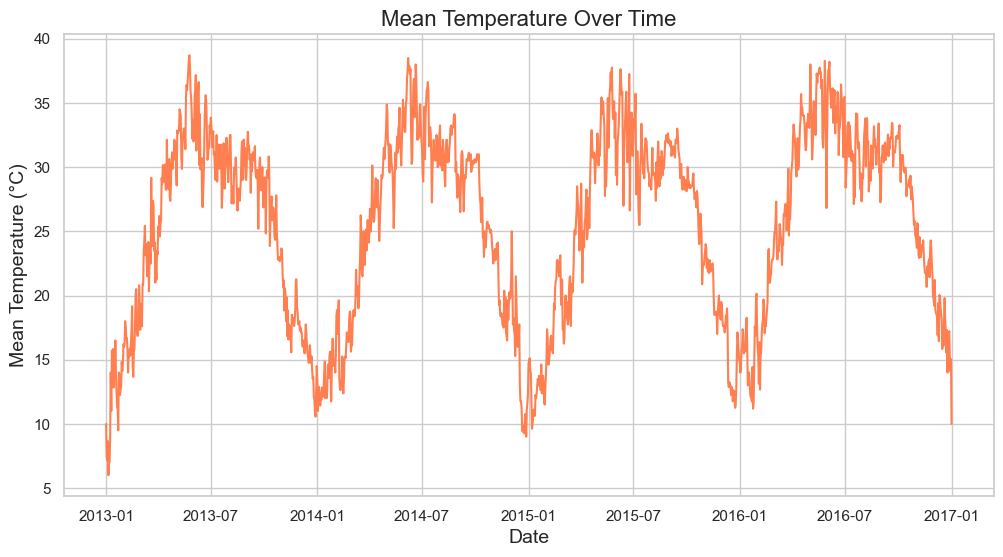

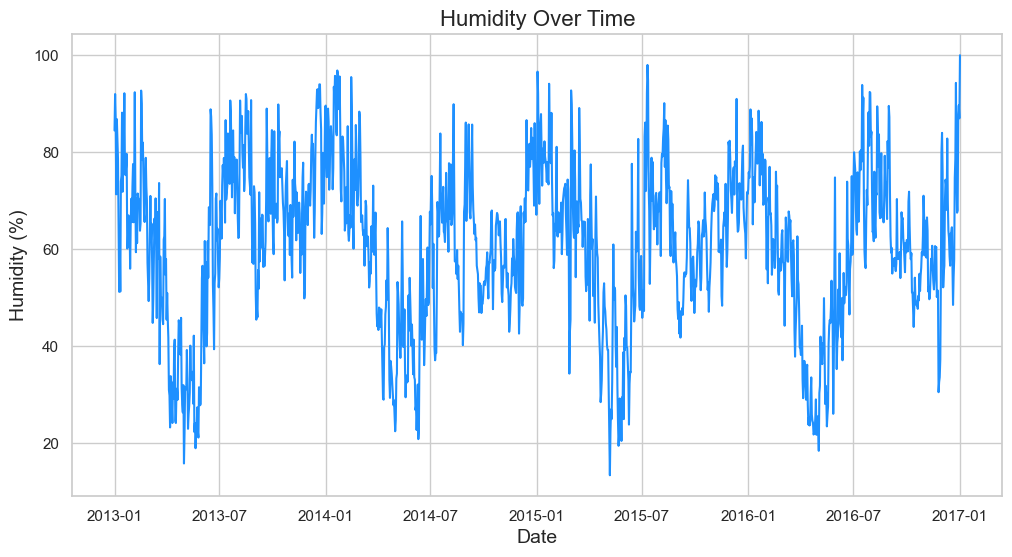

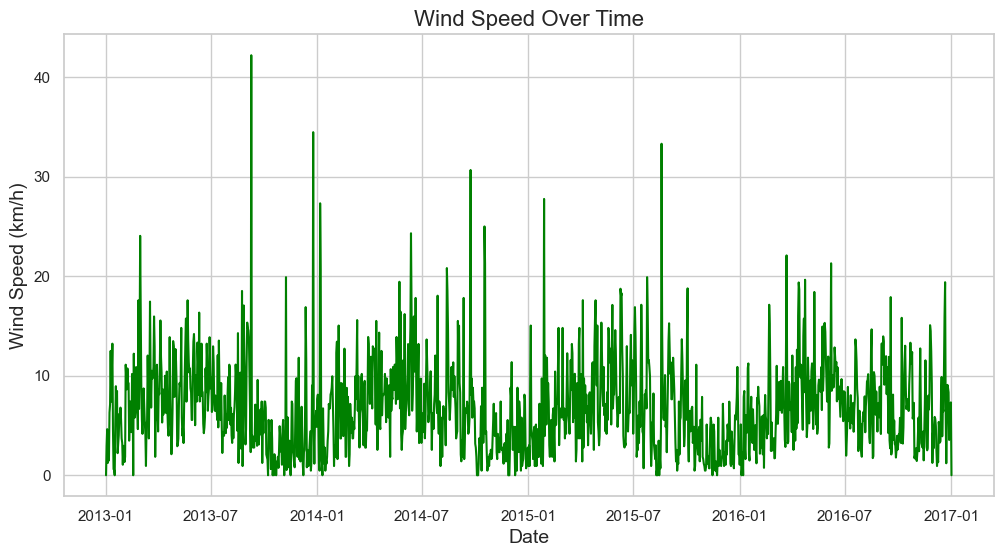

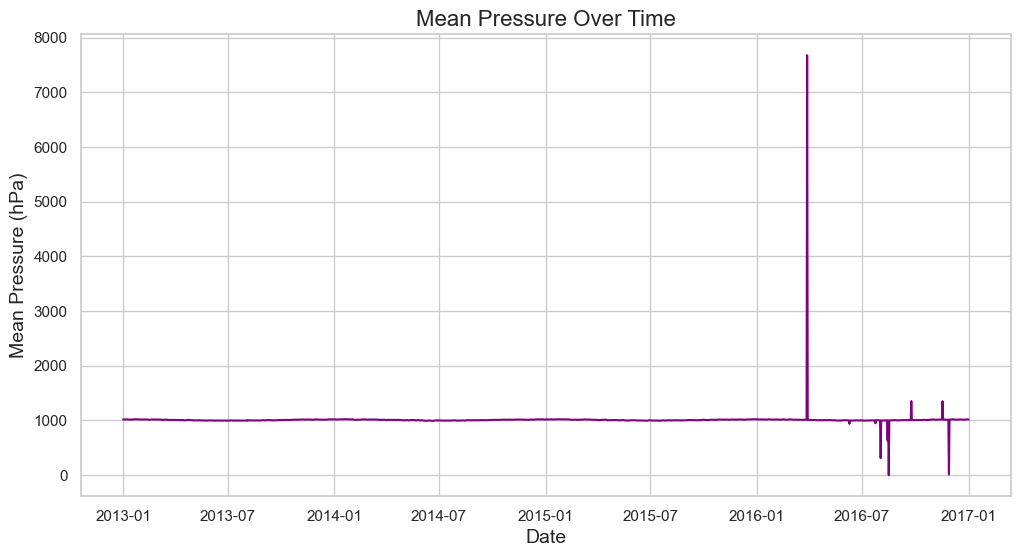

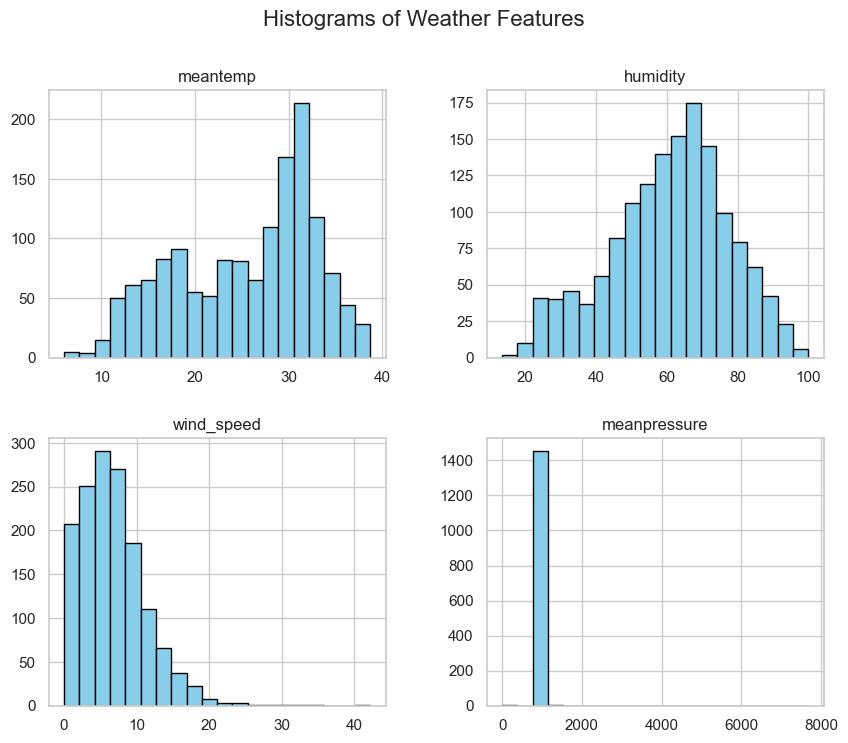

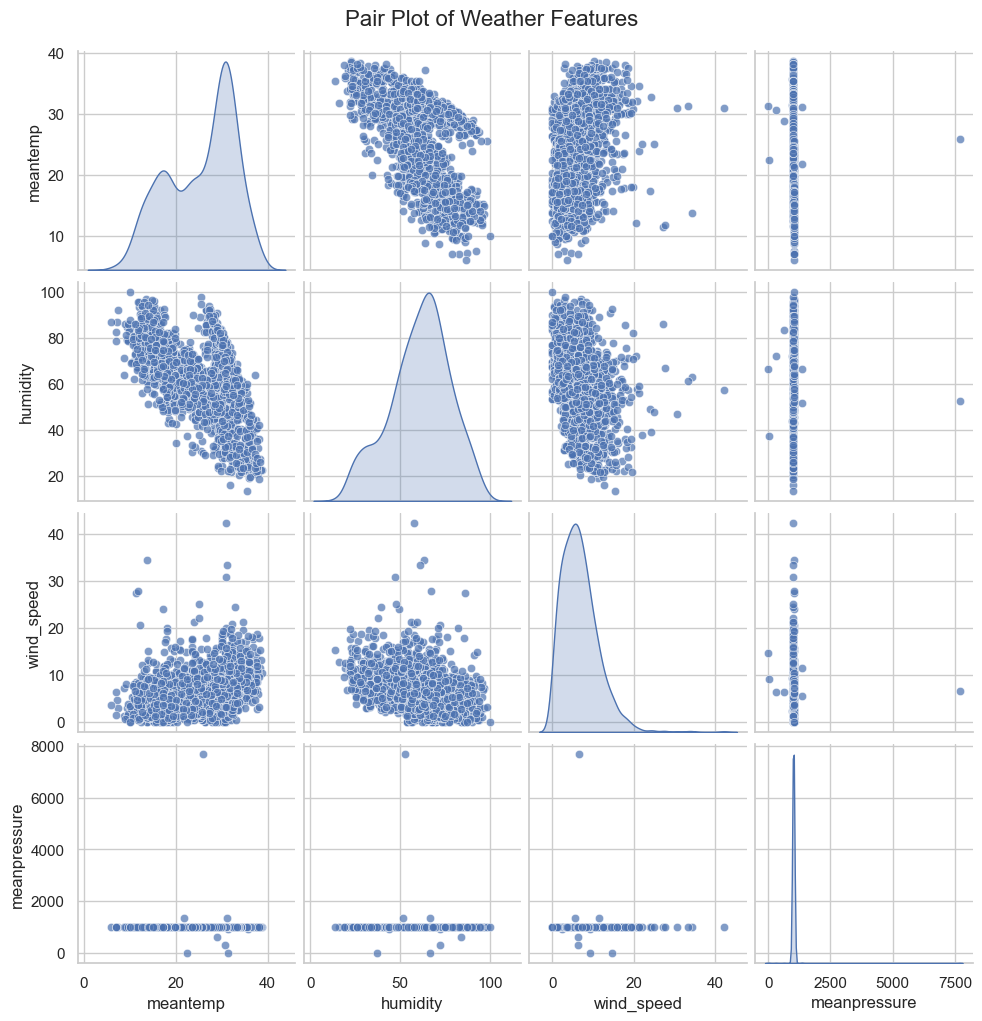

In [5]:
df.set_index('date', inplace=True)

sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y='meantemp', data=df, color='coral')
plt.title('Mean Temperature Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Mean Temperature (°C)', fontsize=14)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y='humidity', data=df, color='dodgerblue')
plt.title('Humidity Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y='wind_speed', data=df, color='green')
plt.title('Wind Speed Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Wind Speed (km/h)', fontsize=14)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y='meanpressure', data=df, color='purple')
plt.title('Mean Pressure Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Mean Pressure (hPa)', fontsize=14)
plt.show()

df.hist(figsize=(10, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Weather Features', fontsize=16)
plt.show()

sns.pairplot(df, diag_kind='kde', plot_kws={'alpha':0.7})
plt.suptitle('Pair Plot of Weather Features', y=1.02, fontsize=16)
plt.show()

In [6]:
test_size = 24
test_ind = len(df)- test_size
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [7]:
train

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000,84.500,0.000,1015.667
2013-01-02,7.400,92.000,2.980,1017.800
2013-01-03,7.167,87.000,4.633,1018.667
2013-01-04,8.667,71.333,1.233,1017.167
2013-01-05,6.000,86.833,3.700,1016.500
...,...,...,...,...
2016-12-04,18.900,55.250,5.667,1019.700
2016-12-05,18.636,56.591,4.952,1017.045
2016-12-06,18.538,69.923,2.504,1017.962


In [8]:
test

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2016-12-09,19.417,68.125,1.312,1013.417
2016-12-10,16.444,82.833,5.356,1014.000
2016-12-11,20.042,69.583,4.717,1013.292
2016-12-12,19.909,63.864,3.282,1014.182
2016-12-13,19.050,62.350,3.430,1015.100
2016-12-14,18.556,58.611,8.028,1017.333
2016-12-15,18.167,56.625,9.879,1016.667
2016-12-16,15.833,63.278,3.917,1018.778
2016-12-17,17.500,63.389,6.732,1016.947


In [9]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [10]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

X, y = generator[0]

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
n_features = train_scaled.shape[1]
n_features

4

In [14]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [15]:
model = Sequential()

model.add(SimpleRNN(units=128, activation="tanh", input_shape=(length, n_features), return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=64, activation="tanh", return_sequences=True))
model.add(SimpleRNN(units=32, activation="tanh"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="tanh"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

early_stop = EarlyStopping(monitor='val_loss', patience=10)

model.fit(generator, 
          validation_data=validation_generator,
          callbacks=[early_stop],
          epochs=20)

Epoch 1/20
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0845 - val_loss: 0.0766
Epoch 2/20
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0737 - val_loss: 0.0771
Epoch 3/20
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0732 - val_loss: 0.0807
Epoch 4/20
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0730 - val_loss: 0.0749
Epoch 5/20
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 0.0714 - val_loss: 0.0763
Epoch 6/20
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0754 - val_loss: 0.0767
Epoch 7/20
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0738 - val_loss: 0.0762
Epoch 8/20
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0732 - val_loss: 0.0748
Epoch 9/20
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 0.0731 - val_loss: 0.0746
Epoch 10/20
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 0.0725 - val_loss: 0.0762
Epoch 11/20
1426/1426 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 0.0735 - val_loss: 0.0758
Epoch 12/20
1426/1426 ━━━━

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 12, 128)        │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 12, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,653 (436.15 KB)

 Trainable params: 37,217 (145.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 74,436 (290.77 KB)

<Axes: >

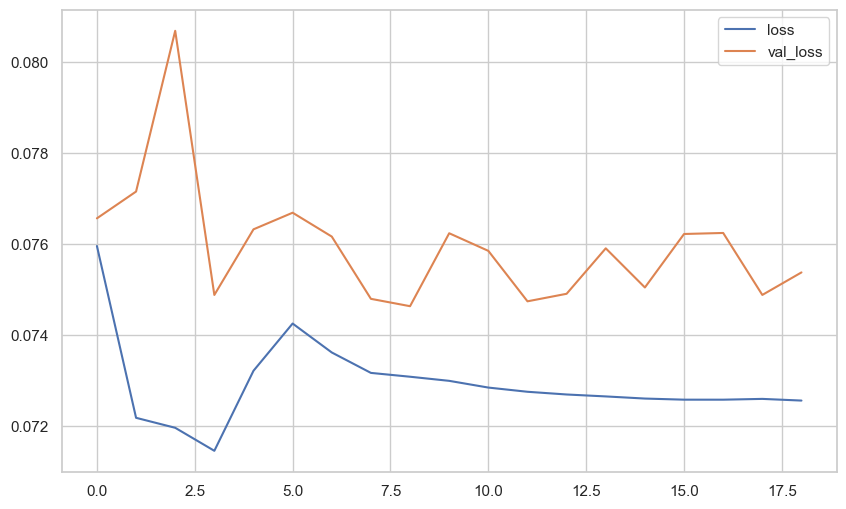

In [17]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    return print("\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [19]:
predictions_scaled = []

first_eval_batch = df[-length:].values 
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    current_pred = np.random.rand(1, 1, 1)  
    predictions_scaled.append(current_pred[0][0])  
    
    current_pred_reshaped = np.array([[current_pred[0][0]] * n_features]).reshape(1, 1, n_features)
    current_batch = np.append(current_batch[:, 1:, :], current_pred_reshaped, axis=1)

predictions_scaled = np.array(predictions_scaled).reshape(-1, 1)

expanded_predictions_scaled = np.zeros((predictions_scaled.shape[0], n_features))
expanded_predictions_scaled[:, 0] = predictions_scaled[:, 0]
current_pred

array([[[0.97330806]]])

In [20]:
current_batch

array([[[0.43629328, 0.43629328, 0.43629328, 0.43629328],
        [0.6878021 , 0.6878021 , 0.6878021 , 0.6878021 ],
        [0.63368806, 0.63368806, 0.63368806, 0.63368806],
        [0.57340689, 0.57340689, 0.57340689, 0.57340689],
        [0.86327523, 0.86327523, 0.86327523, 0.86327523],
        [0.75469911, 0.75469911, 0.75469911, 0.75469911],
        [0.53686692, 0.53686692, 0.53686692, 0.53686692],
        [0.81717968, 0.81717968, 0.81717968, 0.81717968],
        [0.31530827, 0.31530827, 0.31530827, 0.31530827],
        [0.21117858, 0.21117858, 0.21117858, 0.21117858],
        [0.07164139, 0.07164139, 0.07164139, 0.07164139],
        [0.97330806, 0.97330806, 0.97330806, 0.97330806]]])

In [21]:
predictions_scaled

array([[0.43629328],
       [0.6878021 ],
       [0.63368806],
       [0.57340689],
       [0.86327523],
       [0.75469911],
       [0.53686692],
       [0.81717968],
       [0.31530827],
       [0.21117858],
       [0.07164139],
       [0.97330806]])

In [22]:
aligned_test_scaled = test_scaled[length:, 0] 
eval_metrics(aligned_test_scaled, predictions_scaled)


mae: 0.31813397264376825 
mse: 0.15672994202178542 
rmse: 0.3958913260249401


In [23]:
print(predictions_scaled.shape)

(12, 1)


In [24]:
forecast = scaler.inverse_transform(expanded_predictions_scaled)
forecast

array([[20.27302312, 13.42857143,  0.        , -3.04166667],
       [28.50095427, 13.42857143,  0.        , -3.04166667],
       [26.73065239, 13.42857143,  0.        , -3.04166667],
       [24.75859691, 13.42857143,  0.        , -3.04166667],
       [34.24143246, 13.42857143,  0.        , -3.04166667],
       [30.68944226, 13.42857143,  0.        , -3.04166667],
       [23.56321796, 13.42857143,  0.        , -3.04166667],
       [32.7334494 , 13.42857143,  0.        , -3.04166667],
       [16.31508486, 13.42857143,  0.        , -3.04166667],
       [12.90855648, 13.42857143,  0.        , -3.04166667],
       [ 8.343697  , 13.42857143,  0.        , -3.04166667],
       [37.84107808, 13.42857143,  0.        , -3.04166667]])

In [25]:
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000,84.500,0.000,1015.667
2013-01-02,7.400,92.000,2.980,1017.800
2013-01-03,7.167,87.000,4.633,1018.667
2013-01-04,8.667,71.333,1.233,1017.167
2013-01-05,6.000,86.833,3.700,1016.500
...,...,...,...,...
2016-12-28,17.217,68.043,3.548,1015.565
2016-12-29,15.238,87.857,6.000,1016.905
2016-12-30,14.095,89.667,6.267,1017.905


In [26]:
forecast_df = pd.DataFrame(forecast, columns=df.columns, index=pd.date_range(start='2017-01-01', periods=length, freq='M'))
forecast_df

,meantemp,humidity,wind_speed,meanpressure
2017-01-31,20.273,13.429,0.000,-3.042
2017-02-28,28.501,13.429,0.000,-3.042
2017-03-31,26.731,13.429,0.000,-3.042
2017-04-30,24.759,13.429,0.000,-3.042
2017-05-31,34.241,13.429,0.000,-3.042
2017-06-30,30.689,13.429,0.000,-3.042
2017-07-31,23.563,13.429,0.000,-3.042
2017-08-31,32.733,13.429,0.000,-3.042
2017-09-30,16.315,13.429,0.000,-3.042
2017-10-31,12.909,13.429,0.000,-3.042


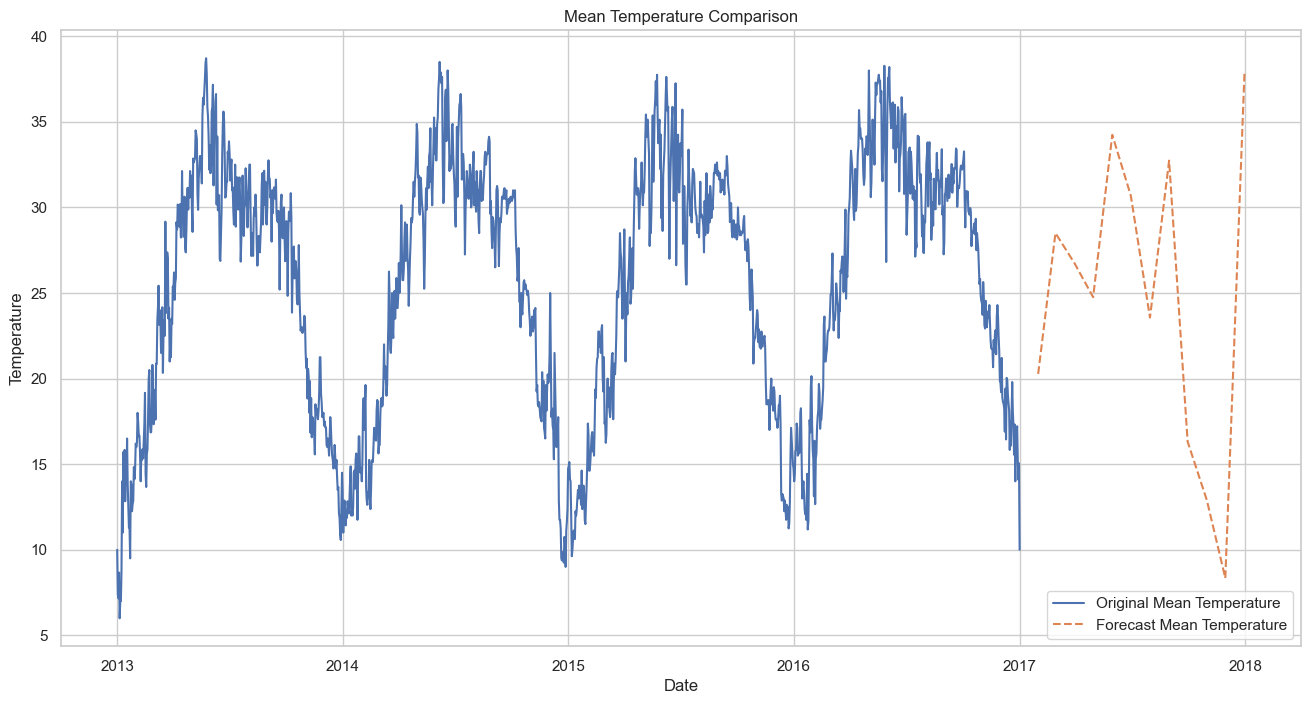

In [27]:
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['meantemp'], label='Original Mean Temperature')
plt.plot(forecast_df.index, forecast_df['meantemp'], label='Forecast Mean Temperature', linestyle='--')
plt.title('Mean Temperature Comparison')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend();